# Final Project: Mall Customer Segmentation

Imagine you own a shopping mall. You have collected some data on your shoppers but want to know which shoppers to focus your marketing budget on. Using clustering methods, we will segment the data into seperate groups to get a better understanding of who to target.

The data comes from Kaggle and can be found [here](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

This notebook was created in google colabs. If you are using a local jupyter notebook, please download the dataset, skip the first to two cells, update the local path, and unmark those lines in the third cell. Thank you.

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))


In [3]:
import pandas as pd
import io
#local_path = ''
#df = pd.read_csv(local_path)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

# EDA

First, let's take some time to understand the mall customer dataset.

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are five columns and 200 rows. The columns are custromerID, Gender, Age, Annual Income in thousands of dollars, and Spending Score ranging from 1 to 100. There doesn't appear to be in null values. Let's take a better look with some statistics and graphs.

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The mean age of the customers is about 39 years old. The mean annual income is about 61 thousand dollars  a year and the mean spending score is about 50.

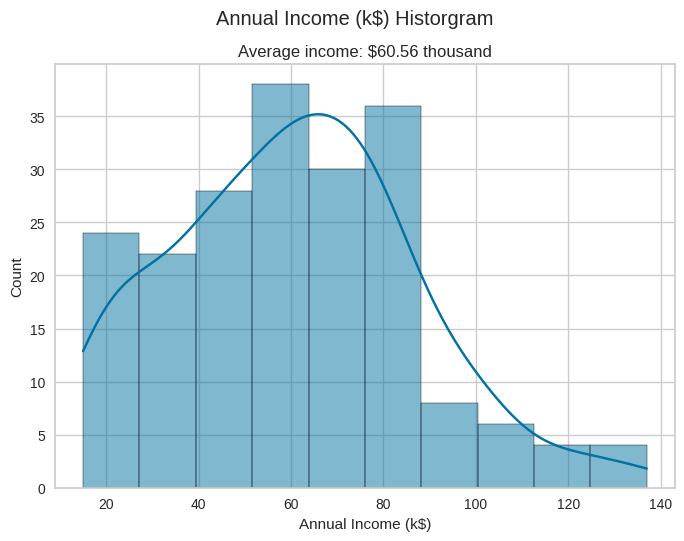

In [48]:
mean_income = np.mean(df['Annual Income (k$)']).round(2)
mean_income_str = mean_income.astype('str')
median_income = np.median(df['Annual Income (k$)']).round(2)

sns.histplot(data=df, x='Annual Income (k$)',kde=True)
plt.suptitle('Annual Income (k$) Historgram')
plt.title('Average income: $'+ mean_income_str  + ' thousand')
plt.show()

We can see that the average income is around $60 thousand.

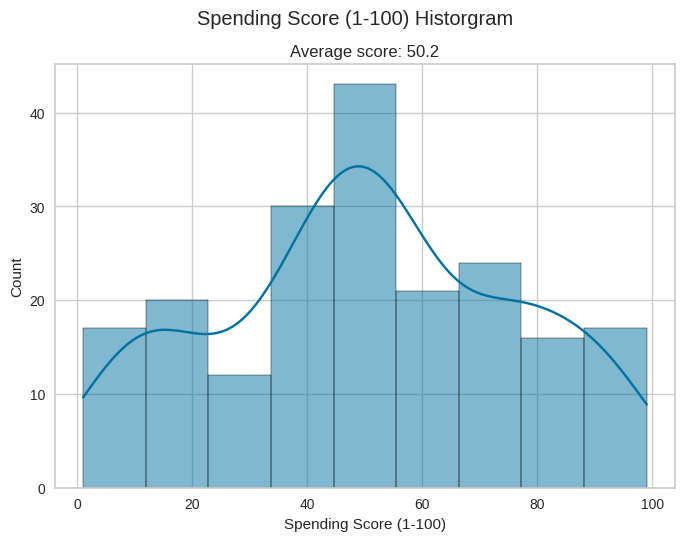

In [52]:
mean_score = np.mean(df['Spending Score (1-100)']).round(2)
mean_score_str = mean_score.astype('str')
sns.histplot(data=df, x='Spending Score (1-100)',kde=True)
plt.suptitle('Spending Score (1-100) Historgram')
plt.title('Average score: '+ mean_score_str)
plt.show()

The average spending score is about 50.

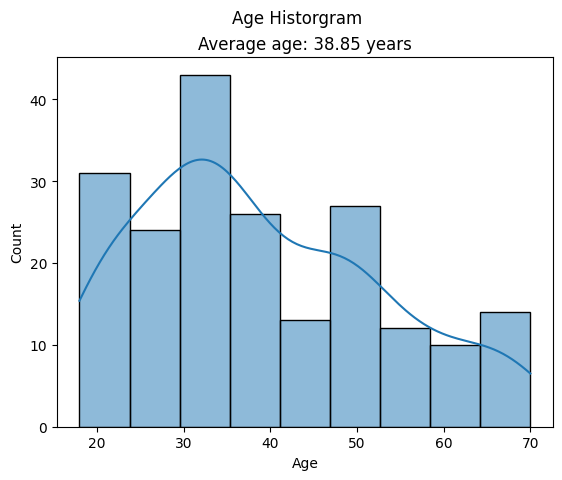

In [ ]:
mean_age= np.mean(df['Age']).round(2).astype('str')
sns.histplot(data=df, x='Age',kde=True)
plt.suptitle('Age Historgram')
plt.title('Average age: '+ mean_age + ' years')
plt.show()

The average age is around 39 years old.

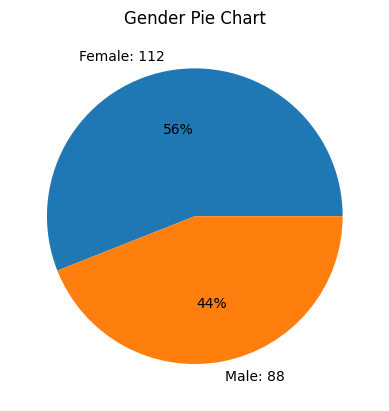

In [ ]:
df['Gender'].value_counts().index
fig, ax = plt.subplots()
ax.pie(df['Gender'].value_counts(), labels=(df['Gender'].value_counts().index + ': '
+ df['Gender'].value_counts().astype('str')),  autopct='%.0f%%')
ax.set_title('Gender Pie Chart')
plt.show()

The distribution of males and females is roughly half with there being 56% of the customers in the data set female.

Let's convert the gender column into numbers Male = 1, Female = 0.

In [ ]:
le =  LabelEncoder()
df['Gender_num'] = le.fit_transform(df['Gender'])

Now let's take a look how gender impacts the other categories.

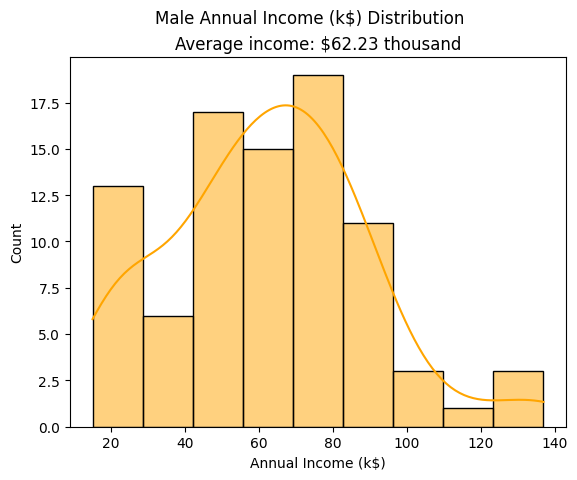

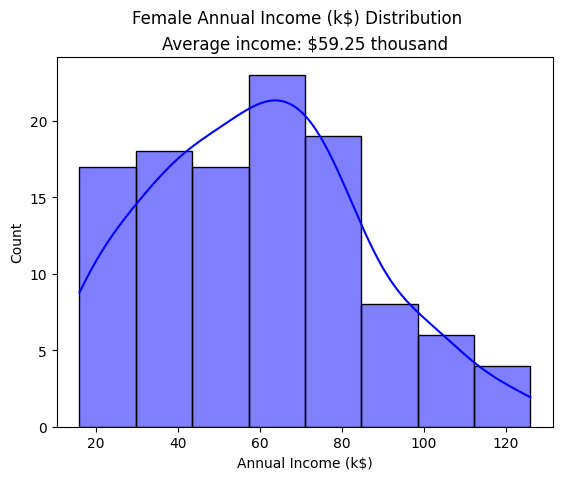

In [ ]:
plt.figure(1)
male_mean_income = np.mean(df[df.Gender == 'Male']['Annual Income (k$)']).round(2).astype('str')
sns.histplot(df[df.Gender == 'Male']['Annual Income (k$)'], color='orange', kde = True)
plt.suptitle('Male Annual Income (k$) Distribution')
plt.title('Average income: $'+ male_mean_income + ' thousand')

plt.figure(2)
female_mean_income = np.mean(df[df.Gender == 'Female']['Annual Income (k$)']).round(2).astype('str')
sns.histplot(df[df.Gender == 'Female']['Annual Income (k$)'], color='blue', kde = True)
plt.suptitle('Female Annual Income (k$) Distribution')
plt.title('Average income: $'+ female_mean_income + ' thousand')


plt.show()

When comparing the two genders, we see that the average male income, 62 thousand dollars a year, is slightly larger than the female average income, 59 thousand dollars a year.

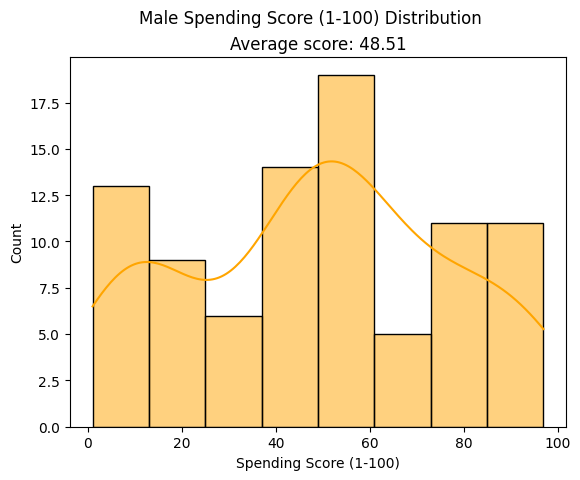

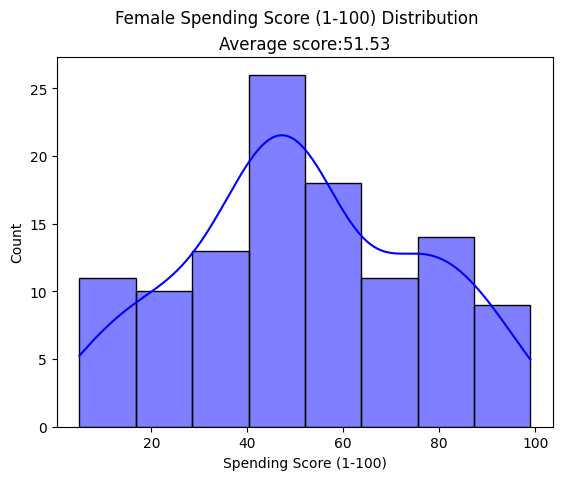

In [ ]:
plt.figure(1)
male_mean_score = np.mean(df[df.Gender == 'Male']['Spending Score (1-100)']).round(2).astype('str')
sns.histplot(df[df.Gender == 'Male']['Spending Score (1-100)'], color='orange', kde = True)
plt.suptitle('Male Spending Score (1-100) Distribution')
plt.title('Average score: '+ male_mean_score)

plt.figure(2)
female_mean_score = np.mean(df[df.Gender == 'Female']['Spending Score (1-100)']).round(2).astype('str')
sns.histplot(df[df.Gender == 'Female']['Spending Score (1-100)'], color='blue', kde = True)
plt.suptitle('Female Spending Score (1-100) Distribution')
plt.title('Average score:' + female_mean_score)

plt.show()

The average male spending score is slightly lower, 49, than the female spending score, 51.

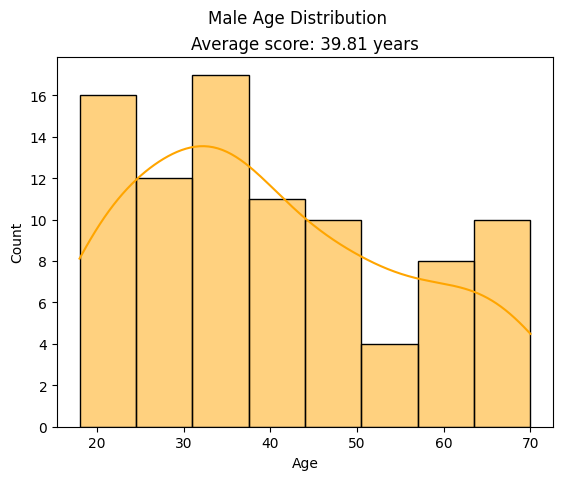

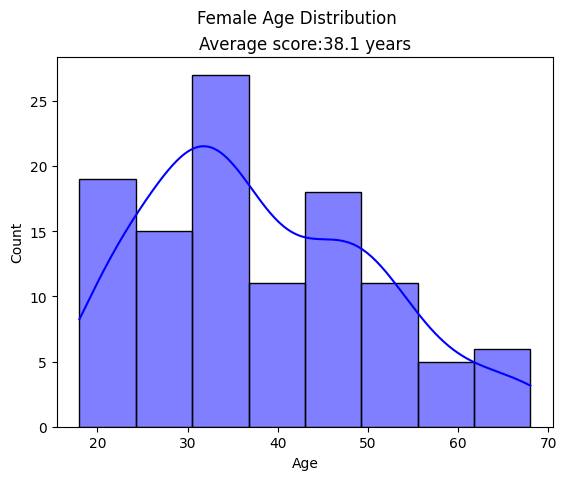

In [ ]:
plt.figure(1)

male_mean_age = np.mean(df[df.Gender == 'Male']['Age']).round(2).astype('str')
sns.histplot(df[df.Gender == 'Male']['Age'], color='orange', kde = True)
plt.suptitle('Male Age Distribution')
plt.title('Average score: '+ male_mean_age + ' years')

plt.figure(2)

female_mean_age = np.mean(df[df.Gender == 'Female']['Age']).round(2).astype('str')
sns.histplot(df[df.Gender == 'Female']['Age'], color='blue', kde = True)
plt.suptitle('Female Age Distribution')
plt.title('Average score:' + female_mean_age + ' years')

plt.show()

Again the average age is very similar, with the average male age being 40 and the average female age being 38.

Now let's take a look at a pairplot of our numerical features. We will compare age with annual income, age with spending score, and annual income with spending score. We will color the points based on gender.

In [20]:
df[df.columns[1:5]]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


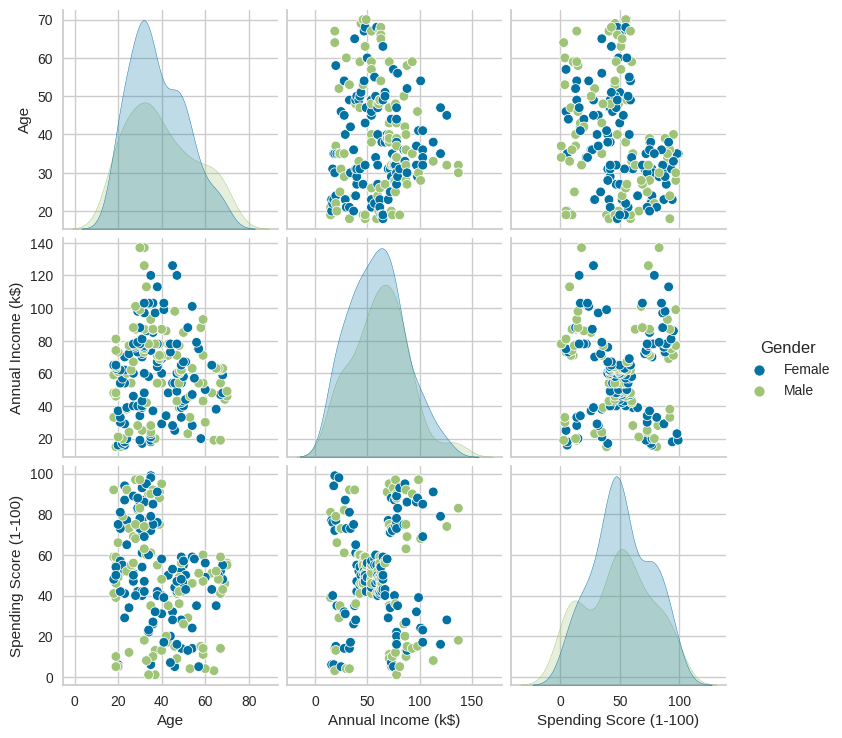

In [21]:
sns.pairplot(df[df.columns[1:5]],hue = 'Gender', hue_order=['Female','Male'])

plt.show()

After taking a look at each plot, we can see that there isn't any apparent clusters forming within the age plots. But between annual income and spending score, there appears to be some dispersion. Let's take a closer look.

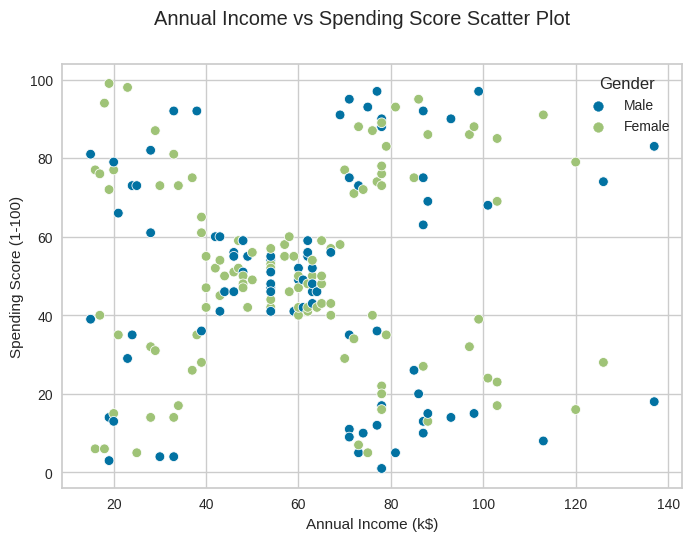

In [ ]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],data = df, hue='Gender')
plt.suptitle('Annual Income vs Spending Score Scatter Plot')
plt.show()

With this closer look, we can start to see clusters forming. Let's use the KMeans clustering model to investigate.

# KMeans Model

The Kmeans clustering model measures the distance between each data point and a centroid. The number of centroids corresponds with the number of clusters. Let's prepare our data set and plot what the data looks like with a range of clusters.

In [24]:
df.columns[2:6]

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [25]:
df_KM = df[df.columns[2:6]]
df_KM.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Now that the data is prepared, it is time to create our model. We will be using the KMeans model in the scikit-learn library.

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(df_KM)
visualizer.show()
plt.show()

In this elbow plot we see the number of centroids, clusters, on the x axis, and the distortion score on the y axis. The distortion score is an average squared distance of the points within each cluster.

It appears that the best number of clusters is 5. Let's build a model to represent these clusters.

In [ ]:
KM_5 = KMeans(n_clusters = 5, init = 'k-means++')
KM_5.fit(df_KM)
cluster_5_labels = KM_5.predict(df_KM)

In [ ]:
df_KM['Clusters_5'] = cluster_5_labels
df['Clusters_5'] = cluster_5_labels

In [38]:
df_KM.head()

,Age,Annual Income (k$),Spending Score (1-100),Clusters_5
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3


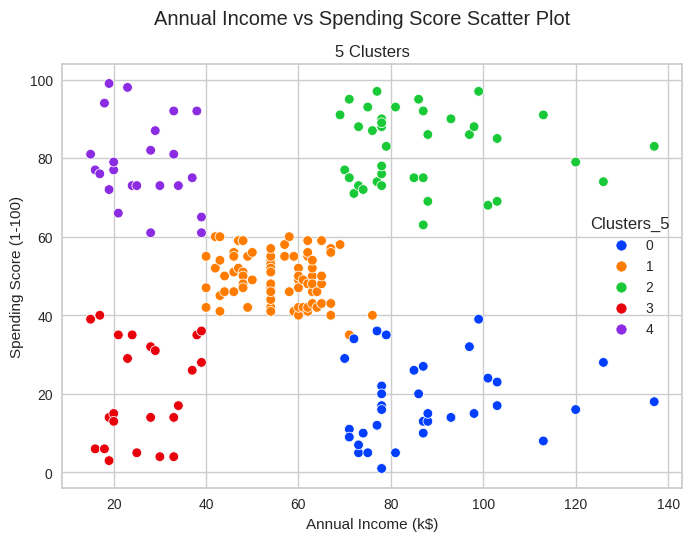

In [39]:
sns.scatterplot(x=df_KM['Annual Income (k$)'], y=df_KM['Spending Score (1-100)'],data = df_KM, hue='Clusters_5',palette="bright")
plt.suptitle('Annual Income vs Spending Score Scatter Plot')
plt.title('5 Clusters')
plt.show()

We can see 5 distinct clusters when comparing annual income and spending score. Let's see how this looks when compare age with spending score.

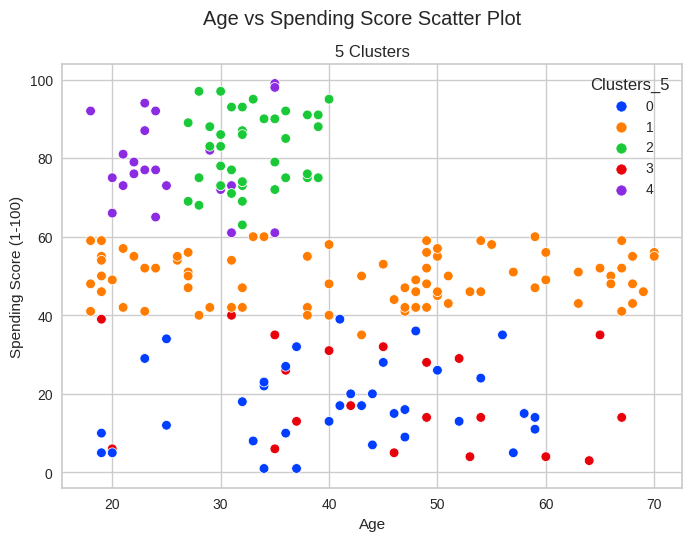

In [31]:
sns.scatterplot(x=df_KM['Age'], y=df_KM['Spending Score (1-100)'],data = df_KM, hue='Clusters_5',palette="bright")
plt.suptitle('Age vs Spending Score Scatter Plot')
plt.title('5 Clusters')
plt.show()

When can see that the age of the customer varies across spending score. There are some interesting observations. Cluster 1 takes up the middle of the graph spans the entire age range. It might mean that those average spending scores is not heavily related to age.

In [40]:
df_KM['Clusters_5'].value_counts()

1    79
2    39
0    36
3    23
4    23
Name: Clusters_5, dtype: int64

When we take a look at the number of each customer in the clusters, we see that the majority of the customers fall into the 1 clusters. This cluster took up the center of both our annual income vs spending score, and age vs spending score.

Let's see how our data would look with 6 clusters.

In [ ]:
KM_6 = KMeans(n_clusters = 6, init = 'k-means++')
KM_6.fit(df_KM)
cluster_6_labels = KM_6.predict(df_KM)

In [ ]:
df_KM['Clusters_6'] = cluster_6_labels

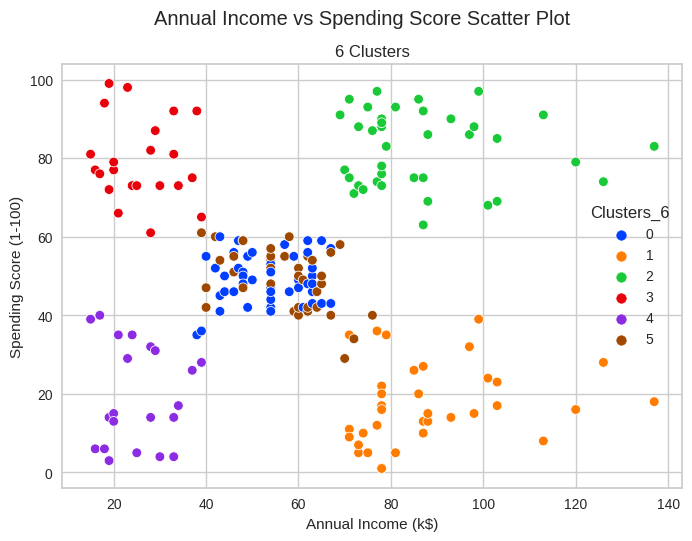

In [ ]:
sns.scatterplot(x=df_KM['Annual Income (k$)'], y=df_KM['Spending Score (1-100)'],data = df_KM, hue='Clusters_6',palette="bright")
plt.suptitle('Annual Income vs Spending Score Scatter Plot')
plt.title('6 Clusters')
plt.show()

It appears that the 6th cluster seems to have broken up our original large cluster. Let's take a look at the number of customers to see.

In [ ]:
df_KM['Clusters_6'].value_counts()

0    45
2    39
5    38
1    35
3    22
4    21
Name: Clusters_6, dtype: int64

We originally had 79 customers in the large cluster. Now it has dropped to 45. I think our 5 clusters better separate out data.

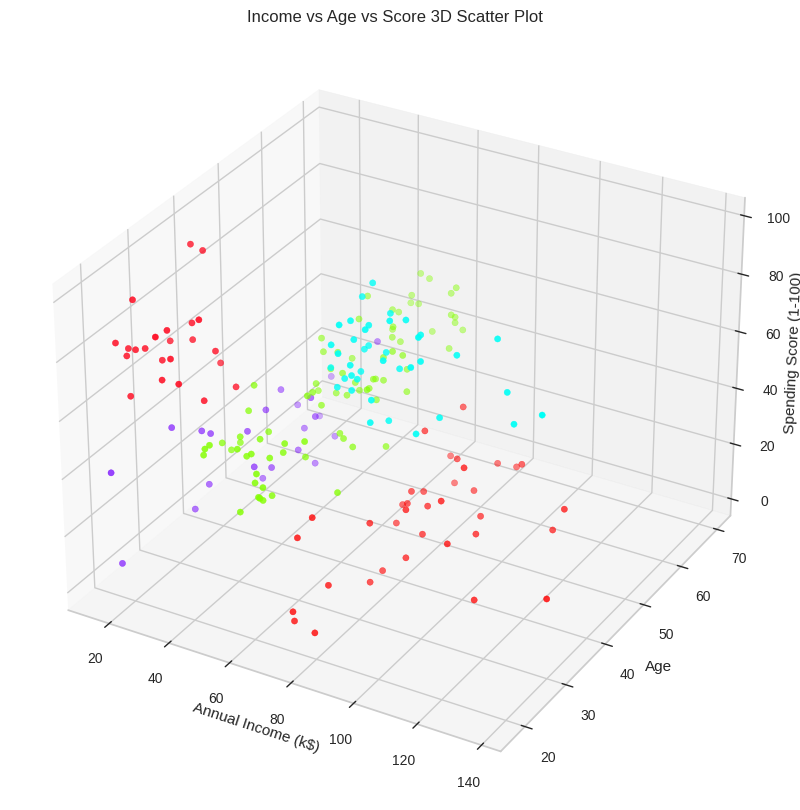

In [34]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
cmap = plt.get_cmap('hsv')
ax.scatter3D(df_KM['Annual Income (k$)'], df_KM['Age'], df_KM['Spending Score (1-100)'], c = df_KM['Clusters_5'],cmap=cmap,label=df_KM['Clusters_5'])
plt.title('Income vs Age vs Score 3D Scatter Plot')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')


plt.show()

This is an interesting representation of the clusters in a 3D graph. However, it is hard to gather any meaningful observations. Let's take a closer look at the breakdown of some of the clusters.

# Results

Our goal is to identify groups of users that a marketing team can focus their efforts on. Let's look at a breakdown of some of the cluster groups.

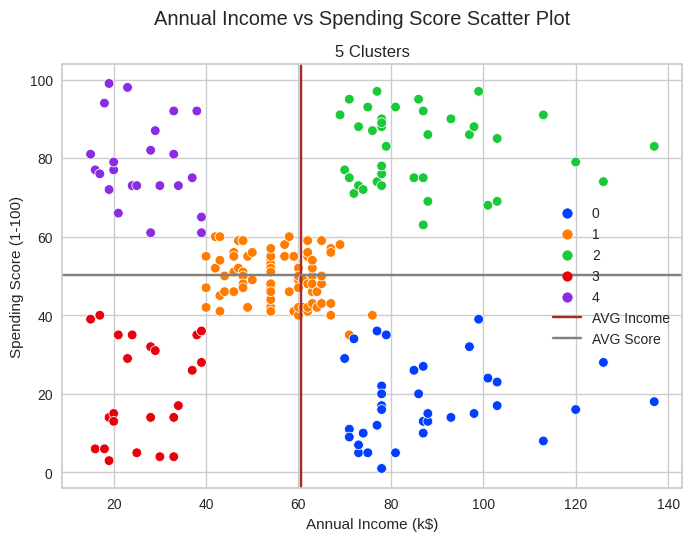

In [55]:
sns.scatterplot(x=df_KM['Annual Income (k$)'], y=df_KM['Spending Score (1-100)'],data = df_KM, hue='Clusters_5',palette="bright")
plt.axvline(mean_income,label = 'AVG Income',color = 'brown')
plt.axhline(mean_score,label = 'AVG Score',color = 'grey')
plt.suptitle('Annual Income vs Spending Score Scatter Plot')
plt.title('5 Clusters')
plt.legend()

plt.show()

In [37]:
df[df['Clusters_5']==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clusters_5
count,36.000000,36.000000,36.000000,36.000000,36.0
mean,163.500000,40.666667,87.750000,17.583333,0.0
std,21.785316,11.496583,16.387059,10.204691,0.0
min,125.000000,19.000000,70.000000,1.000000,0.0
25%,146.500000,34.000000,77.000000,10.000000,0.0
50%,164.000000,41.500000,83.000000,16.000000,0.0
75%,181.500000,47.250000,97.250000,24.500000,0.0
max,199.000000,59.000000,137.000000,39.000000,0.0


This cluster was represented in the lower right of our annual income and spending score graph. These customers had a higher income but a lower spending score.

In [43]:
df[df['Clusters_5']==2].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clusters_5
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,86.538462,82.128205,2.0
std,22.803509,3.728650,16.312485,9.364489,0.0
min,124.000000,27.000000,69.000000,63.000000,2.0
25%,143.000000,30.000000,75.500000,74.500000,2.0
50%,162.000000,32.000000,79.000000,83.000000,2.0
75%,181.000000,35.500000,95.000000,90.000000,2.0
max,200.000000,40.000000,137.000000,97.000000,2.0


This cluster represents the customers with a high annual income and a high spending score. It would be interesting to compare their spending habits with the customers in the high annual income and low spending score cluster.

In [41]:
df[df['Clusters_5']==1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Clusters_5
count,79.000000,79.000000,79.000000,79.000000,79.0
mean,86.265823,43.088608,55.291139,49.569620,1.0
std,23.490156,16.478572,8.710665,6.242295,0.0
min,47.000000,18.000000,40.000000,35.000000,1.0
25%,66.500000,27.000000,48.000000,44.500000,1.0
50%,86.000000,47.000000,54.000000,50.000000,1.0
75%,105.500000,54.500000,62.000000,55.000000,1.0
max,143.000000,70.000000,76.000000,60.000000,1.0


This cluster had the most customers in it. It was in the center of our annual income and spending score graph. It represents the customers with around and average income and an average spending score.

We were able to breakdown the data of customers into 5 distinct clusters based on annual income and spending score. In the conclusion, let's explore how this might help our marketing team focus their efforts.

# Conclusion

The overall goal of a marketing team is to increase the amount of money spent by customers. In this data set we looked at 200 shopping mall customers and compared them on a calculated spending score and their annual income. We were able to identify a few clusters that may help the marketing team. The largest cluster was made up of customers with average income and average spending scores. Our team may be able to gather more information on what they are purchasing and market that to them to bring them back to mall.

We also looked at two other groups. Both groups had high annual income but distinctly above and below the average spending scores. If our marketing team can research what is driving the higher spending scores, they may be able to target the other higher income cluster.

KMeans clustering is a perfect model for any marketing team looking to find customer groups to focus their marketing campaigns on.